In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.fft import fft, ifft

In [ ]:
# Sampling frequency (Hz)
sample_freq = 250
# Pre-stimulus time (ms)
start_time = 500
start_idx = int(start_time * 250 / 1000)
# Total epoch time (ms)
total_time = 2840
# Index of wall power
wall_idx = 50 * ((total_time - start_time) / 1000)

data = scipy.io.loadmat("data/S001.mat")["data"]

In [41]:
data.shape

(8, 710, 2, 10, 12)

In [141]:
time_series = data[:, start_idx:, 1, 0, 1]
time_points = 1000 * np.arange(np.shape(time_series)[1]) / 250
for i in range(8):
    time_series[i, :] -= np.average(time_series[i, :])

In [145]:
time_series.shape

(8, 585)

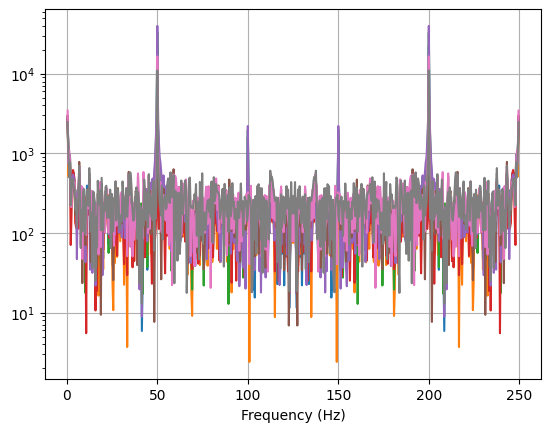

In [147]:
fig = plt.figure()

freq_points = np.arange(1, time_series.shape[1]) / ((total_time - start_time) / 1000)
freq_series = fft(time_series, axis=1)

ax = fig.add_subplot(1, 1, 1)
for i in range(8):
    ax.plot(freq_points, np.abs(freq_series[i, 1:]))
ax.set_xlabel("Frequency (Hz)")
ax.set_yscale("log")

plt.grid()
plt.show()

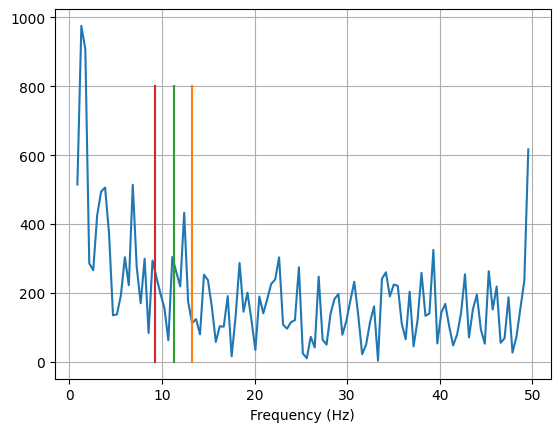

In [135]:
fig = plt.figure()
freq_series = fft(time_series)

ax = fig.add_subplot(1, 1, 1)
ax.plot(freq_points[2:117], np.abs(freq_series[2:117]))
ax.plot([13.25, 13.25], [0, 800])
ax.plot([11.25, 11.25], [0, 800])
ax.plot([9.25, 9.25], [0, 800])
ax.set_xlabel("Frequency (Hz)")

plt.grid()
plt.show()